# Decision Tree Classifier 🌳🌳
## Importing libraries and dataset

0. Import usual libraries

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)


from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz




import matplotlib.pyplot as plt
import warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.metrics import classification_report



1. Import the bl.txt dataset and display the first few lines.

In [161]:
dataset = pd.read_csv("../12_assets/05_supervised_ML/bl.txt")
dataset.head()

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


2. Display a descriptive statistic table

In [162]:
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
balance,625,3,R,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_weight,625.0,NaN,NaN,NaN,3.0,1.415346,1.0,2.0,3.0,4.0,5.0
left_distance,625.0,NaN,NaN,NaN,3.0,1.415346,1.0,2.0,3.0,4.0,5.0
right_weight,625.0,NaN,NaN,NaN,3.0,1.415346,1.0,2.0,3.0,4.0,5.0
right_distance,625.0,NaN,NaN,NaN,3.0,1.415346,1.0,2.0,3.0,4.0,5.0


In [163]:
dataset["balance"].unique()


array(['B', 'R', 'L'], dtype=object)

In [164]:
dataset.groupby("balance").count()

,left_weight,left_distance,right_weight,right_distance
balance,,,,
B,49,49,49,49
L,288,288,288,288
R,288,288,288,288


In [165]:
dataset["balance"].value_counts()


balance
R    288
L    288
B     49
Name: count, dtype: int64

3. What is the dataset shape?

In [166]:
dataset.shape

(625, 5)

In [167]:
100 * dataset.isnull().sum() / dataset.shape[0]

balance           0.0
left_weight       0.0
left_distance     0.0
right_weight      0.0
right_distance    0.0
dtype: float64

## Preprocessing

4. Separate the target variable "balance" into a Y object and the explanatory variables into a X object.

In [168]:
features_list = dataset.iloc[:, 1:]
target_name   = "balance"

X = dataset.drop(target_name, axis = 1)
Y = dataset.loc[:,target_name]


In [169]:
display(Y)
display(X)

0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: balance, Length: 625, dtype: object

,left_weight,left_distance,right_weight,right_distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
620,5,5,5,1
621,5,5,5,2
622,5,5,5,3
623,5,5,5,4


5. Split the data between a train set with 70% of the data and use the rest to build a test set with random_state=42

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = Y)


## Comparing Decision Trees: Gini or Entropy Criterion?

6. Create an instance of a 'DecisionTreeClassifier' with GINI criterion, and fit it on training data. Beforehand, make any preprocessing that you think is necessary.

In [171]:
numeric_features = X.select_dtypes(include="number").columns

numeric_transformer = Pipeline(
  steps=[
    # ("imputer_num", SimpleImputer(strategy="median")),  
    ("scaler_num" , StandardScaler()),
  ]
)

In [172]:
categorical_features = X.select_dtypes(exclude="number").columns

categorical_transformer = Pipeline(
  steps=[
    ("imputer_cat", SimpleImputer(strategy="most_frequent")),  
    ("encoder_cat", OneHotEncoder(drop="first")),                 
  ]
)

In [173]:

preprocessor = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer,     numeric_features),
    ("cat", categorical_transformer, categorical_features),
  ]
)


In [174]:
labelencoder = LabelEncoder()


In [175]:
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)
# # X_train[0:5]

Y_train = labelencoder.fit_transform(Y_train)
Y_test = labelencoder.transform(Y_test) 
# # Y_train[0:5]


In [176]:
classifier_gini = DecisionTreeClassifier(criterion="gini")  # default gini
classifier_gini.fit(X_train, Y_train)


DecisionTreeClassifier()

7. Display your tree using `plot_tree` from [sklearn.tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

In [177]:
np.unique(Y_train)

array([0, 1, 2])

In [178]:
class_names = labelencoder.inverse_transform([0,1,2])  # permet d'afficher L, B, R

dot_data = export_graphviz(classifier_gini, out_file=None, 
                           feature_names=list(X.columns),  
                           class_names=list(class_names), 
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  


graph.render("DecisionTree")                                # Sauvegarde le graphique dans un fichier

'DecisionTree.pdf'

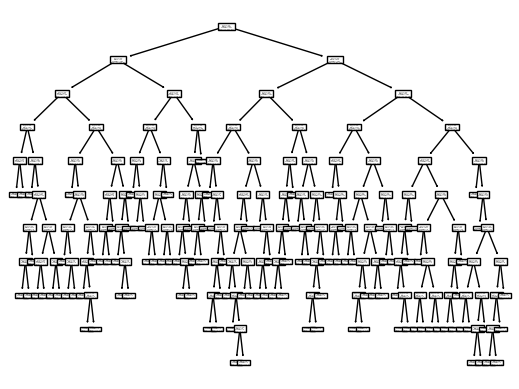

In [179]:
tree.plot_tree(classifier_gini);

8. Create an instance of a DecisionTreeClassifier using the entropy criterion.

In [180]:
classifier_entropy = DecisionTreeClassifier(criterion="entropy")  
classifier_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

9. Display the tree

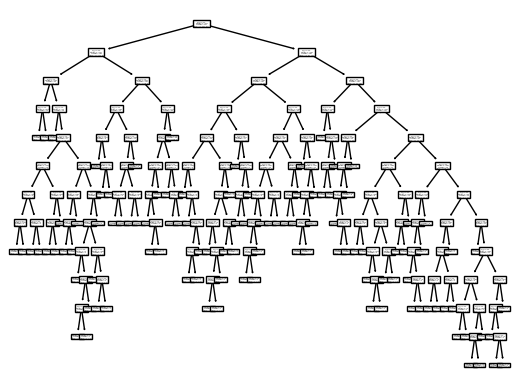

In [181]:
tree.plot_tree(classifier_entropy);

10. Check if the observation defined as X_new  [4, 4, 3, 3] is classified as left

In [182]:
print(classifier_gini.predict([[4,4,3,3]]))

[1]


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [183]:

# TODO Inverse... pour retrouver L B ou R

11. Use the gini classifier to make predictions on the test set

In [184]:
y_pred_gini = classifier_gini.predict(X_test)
y_pred_gini

array([2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2])

12. Use the entropy classifier on the test set to make predictions

In [185]:
y_pred_entropy = classifier_entropy.predict(X_test)
y_pred_entropy

array([2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2,
       1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1,
       2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2])

12. Compare each prediction made with the gini and entropy classifier, what proportion of predictions are identical?

You can either compare each prediction using a for loop over all observations' indices, otherwise you simply loop over the two prediction vectors using the ```zip``` function
You can figure out what ```zip``` does by running
```
A=[1,2,3]
B=["a","b","c"]

for a, b in zip(A,B):
  print(a,b)
```

The numbers appearing in the solution will not necessarily the ones you will obtain depending on random operations you ran on your data.

In [186]:
for a, b in zip(y_pred_gini,y_pred_entropy):
  print(a,b)

2 2
1 1
0 2
2 2
1 1
2 2
2 2
2 2
0 0
1 1
2 2
2 2
0 0
0 0
2 2
1 1
1 1
1 1
1 1
2 2
2 0
2 2
1 1
2 2
2 2
0 0
2 0
0 0
1 1
2 2
2 2
1 1
2 2
1 1
2 2
2 2
0 0
2 2
2 2
2 2
1 1
0 0
1 2
1 1
2 2
1 0
2 2
2 2
2 2
1 1
0 0
1 1
1 1
1 1
2 2
1 1
2 2
1 0
2 1
2 2
1 1
1 1
2 0
1 1
2 2
1 1
0 2
1 1
1 1
0 0
1 0
1 1
1 1
2 2
1 1
1 1
2 2
1 1
2 0
1 1
1 1
1 1
2 2
2 2
1 1
2 2
1 1
2 2
2 0
1 1
1 1
1 1
1 1
2 2
1 1
2 2
1 1
1 1
2 2
1 1
2 2
1 1
1 1
1 1
1 1
1 1
1 1
2 2
0 0
1 1
2 2
1 1
2 2
1 1
1 0
0 2
2 2
0 0
1 1
2 2
1 1
1 1
1 2
2 2
1 1
1 2
0 0
0 2
1 1
0 2
2 2
1 1
2 2
2 2
0 0
2 2
1 1
2 2
1 1
1 1
1 1
1 1
2 2
1 1
1 1
1 1
2 2
2 2
0 0
1 1
2 2
2 2
0 0
1 1
1 1
2 2
2 2
2 2
2 2
2 2
0 2
1 1
1 1
2 2
1 1
2 2
1 1
1 0
0 0
1 1
2 2
1 1
1 1
1 1
0 0
1 1
2 2
0 0
1 1
0 0
2 2
2 2
1 1
0 0
1 1
0 0
0 0
2 2


In [187]:
count=0
for a, b in zip(y_pred_gini,y_pred_entropy):
  if a!=b:
    count+=1

count/len(y_pred_gini)    

0.10638297872340426

13. What's the accuracy of the gini classifier?

In [188]:
print("Gini - accuracy : ", accuracy_score(Y_test, y_pred_gini))


Gini - accuracy :  0.75


14. What's the accuracy of the entropy classifier? 

In [189]:
print("Entropy - accuracy : ", accuracy_score(Y_test, y_pred_entropy))


Entropy - accuracy :  0.7393617021276596


15. Display the "entropy" model's confusion matrix, what do you notice?

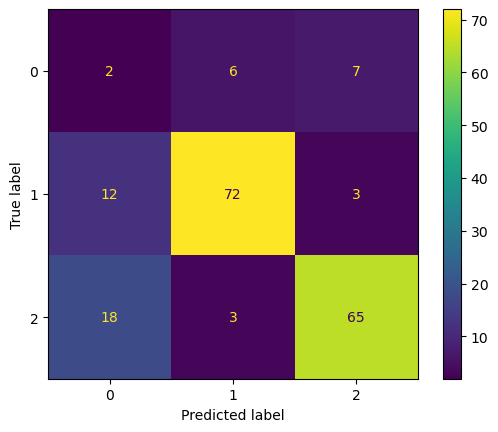

In [190]:
fig , robert = plt.subplots()  
robert.set(
  title="Entropy Confusion Matrix",
)  
ConfusionMatrixDisplay.from_estimator(classifier_entropy, X_test, Y_test, ax=robert)  
plt.show()

# ATTENTION : On prédit 0 mais ça devrait être des 2 ou des 1

**--> Most errors correspond to examples of class 'B' that are misclassified as 'R' or 'L'**

16. Display the classification report for both models on both training and testing data. Do the models perform well? Do they overfit ?

*Hint : have a look at scikit-learn's documentation about available metric functions* 😉

In [120]:
print("Gini", classification_report(Y_test,y_pred_gini))



Gini               precision    recall  f1-score   support

           0       0.07      0.13      0.09        15
           1       0.84      0.84      0.84        87
           2       0.90      0.74      0.82        86

    accuracy                           0.74       188
   macro avg       0.60      0.57      0.58       188
weighted avg       0.81      0.74      0.77       188



In [192]:
print("Entropy", classification_report(Y_train, classifier_gini.predict(X_train)))

Entropy               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



# On overfit sur le train set

In [119]:
print("Entropy", classification_report(Y_test,y_pred_entropy))


Entropy               precision    recall  f1-score   support

           0       0.06      0.13      0.09        15
           1       0.89      0.83      0.86        87
           2       0.87      0.76      0.81        86

    accuracy                           0.74       188
   macro avg       0.61      0.57      0.58       188
weighted avg       0.81      0.74      0.77       188



In [191]:
print("Entropy", classification_report(Y_train, classifier_entropy.predict(X_train)))


Entropy               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



# On overfit sur le train set

## Fighting overfitting

17. How would you fight overfitting while still using decision tree classifiers? Try to find the set of hyper parameters that maximize the performances of the model on the test set. Did the model perform better ? Are there still ways to improve the model?

In [193]:
classifier2 = RandomForestClassifier()

# Grid of values to be tested
params = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 4, 8],
    # "n_estimators": [10, 20, 40, 60, 80, 100],      # ! nb d'arbres qu'on va générer
                                                    # voir la doc max_feature = sqrt de p par défaut
}

gridsearch = GridSearchCV(classifier2, param_grid=params, cv=3)  
gridsearch.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 8]})

In [123]:
y_train_pred_GS = gridsearch.predict(X_train)
y_test_pred_GS = gridsearch.predict(X_test)


In [124]:
print("Gini", classification_report(Y_test,y_test_pred_GS))

Gini               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.87      0.95      0.91        87
           2       0.87      0.92      0.89        86

    accuracy                           0.86       188
   macro avg       0.58      0.62      0.60       188
weighted avg       0.80      0.86      0.83       188



## Feature engineering

18. Try and create new variables in order to improve the model's performance. Make again the preprocessings. And train a new model with gini criterion.

In [125]:
# La solution
dataset['left_prod'] = dataset['left_weight'] * dataset['left_distance']
dataset['right_prod'] = dataset['right_weight'] * dataset['right_distance']
dataset['balanced'] = dataset['right_prod'] - dataset['left_prod']

In [126]:
target_variable = "balance"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify = Y)

In [128]:
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

In [129]:
print(classification_report(Y_train, classifier_gini.predict(X_train)))
print(classification_report(Y_test, classifier_gini.predict(X_test)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        34
           L       1.00      1.00      1.00       201
           R       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        15
           L       1.00      1.00      1.00        87
           R       1.00      1.00      1.00        86

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



# On est parfait !!!